In [1]:
import os
import sys
import mne
import matplotlib as plt
import sleepeegpy
import numpy as np

file_path = "cleaned_eeg_with_annotations_2.fif"
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found.")
else:
    raw = mne.io.read_raw_fif(file_path, preload=True)

print(raw.info)

print(raw.ch_names)

Opening raw data file cleaned_eeg_with_annotations_2.fif...


/var/folders/fy/wgbms_gd5cdfzmkw53vtsh740000gn/T/ipykernel_45068/2860081976.py:12: RuntimeWarning: This filename (cleaned_eeg_with_annotations_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Isotrak not found
    Range : 4608000 ... 13518079 =  18000.000 ... 52804.996 secs
Ready.
Reading 0 ... 8910079  =      0.000 ... 34804.996 secs...
<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, TP7, ...
 chs: 30 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.8 Hz
 lowpass: 40.0 Hz
 meas_date: 2024-11-22 14:08:21 UTC
 meas_id: 4 items (dict)
 nchan: 30
 projs: []
 sfreq: 256.0 Hz
 subject_info: 3 items (dict)
>
['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'TP7', 'TP8', 'P7', 'P8', 'F9', 'F10', 'T9', 'T10', 'P9', 'P10', 'Fz', 'Cz', 'Pz', 'R1', 'R2', 'TIP']


In [ ]:
# Subject info
subject_info = raw.info.get('subject_info', {})
print(subject_info)

print(raw.annotations)

events, event_id = mne.events_from_annotations(raw)
print(events)  # This will show timestamps of detected events

In [2]:
print(raw.annotations.description)  # The names of the annotations
print(raw.annotations.onset)        # The time (in seconds) when they occur
print(raw.annotations.duration) 

['RELAX ' 'BAD' 'BAD' 'Missing 5 samples / 0,02 seconds' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'Missing 1 samples / 0,00 seconds'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'Missing 1 samples / 0,00 seconds' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'B

In [3]:
###### This code contains widgets that will be previewed later in the notebook. ######
####### Run this code and continue. ######
import ipywidgets as widgets
from IPython.display import display

use_example_set = widgets.RadioButtons(
    options=[True, False], description="Use example set?", value=False
)
bad_channels_selection = widgets.RadioButtons(
    options=["automatically", "manually", "from-file"],
    description="Clean Bad Channels:",
    value="automatically",
)
annotations_selection = widgets.RadioButtons(
    options=["automatically", "manually", "from-file"],
    description="Clean bad epochs Annotations:",
    value="from-file",
)

hypno_selection = widgets.RadioButtons(
    options=["automatically", "from-file"], description="Hypnogram:", value="automatically"
)

import pooch
from sleepeegpy.pipeline import (
    CleaningPipe,
    ICAPipe,
    SpectralPipe,
    SpindlesPipe,
    SlowWavesPipe,
    RapidEyeMovementsPipe,
)
from sleepeegpy.dashboard import create_dashboard

from os import makedirs

output_dir = "output_folder"  # Output path and name can be changed here
input_dir = "input_files"  # input files dir can be changed here
makedirs(input_dir, exist_ok=True)
makedirs(output_dir, exist_ok=True)

display(use_example_set)
display(bad_channels_selection)
display(annotations_selection)
display(hypno_selection)

RadioButtons(description='Use example set?', index=1, options=(True, False), value=False)

RadioButtons(description='Clean Bad Channels:', options=('automatically', 'manually', 'from-file'), value='aut…

RadioButtons(description='Clean bad epochs Annotations:', index=2, options=('automatically', 'manually', 'from…

RadioButtons(description='Hypnogram:', options=('automatically', 'from-file'), value='automatically')

In [4]:
print(raw.info.keys())

dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])


In [5]:
subject_code = "Marcus" # The subject code that will appear in the dashboard
eeg_file = "cleaned_eeg_with_annotations_2.fif"
bad_channels = "bad_channels.txt"
annotations = "annotations.txt"
hypnogram_filename = "staging.txt"
hypno_freq = 1  # If required, change the Hypnogram's sampling frequency (Visbrain's hypnograms default to 1)

if hypno_selection.value == "automatically":
    hypnogram_path = "predict"
    #### If you selected automatic hypnogram, select prediction arguments. ####
    hypno_predict_arguments = {
        "eeg_name": "C4", #(C4)
        "eog_name": None, #(EOG1)
        "emg_name": None,
        "ref_name" : "Cz",
    }
else:
    hypno_predict_arguments = None

In [6]:
n_components = 25 # initial was 30
picked_channel = "Pz"  # (Pz)
loc_chname = "R1"  # (EOG1)
roc_chname = "R2"  # (EOG2)

In [7]:
if use_example_set.value:
    cache_dir = pooch.os_cache("sleepeegpy_dataset")
    doi = "10.5281/zenodo.10362189"
    odie = pooch.create(
            path=cache_dir,
            base_url=f"doi:{doi}",
        )
    odie.load_registry_from_doi()

if use_example_set.value:
    ## Nap dataset files: ##
    bad_channels = odie.fetch("nap_bad_channels.txt")
    annotations = odie.fetch("nap_annotations.txt")
    path_to_eeg = odie.fetch("nap_resampled_raw.fif", progressbar=True)
    if hypno_selection.value == "from-file":
            hypnogram_path = odie.fetch("nap_staging.txt", progressbar=True)
else:
    path_to_eeg = os.path.join(input_dir, eeg_file)
    if hypno_selection.value == "from-file":
        hypnogram_path = os.path.join(input_dir, hypnogram_filename)
    bad_channels = (
        None if bad_channels_selection == "automatically" else os.path.join(input_dir, bad_channels))
    annotations = ( None if annotations_selection == "automatically" else os.path.join(input_dir, annotations))

1. Cleaning

Opening raw data file input_files/cleaned_eeg_with_annotations_2.fif...


/opt/anaconda3/envs/sleep_env/lib/python3.10/site-packages/sleepeegpy/base.py:71: RuntimeWarning: This filename (input_files/cleaned_eeg_with_annotations_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  return mne.io.read_raw(self.path_to_eeg)


Isotrak not found
    Range : 4608000 ... 13518079 =  18000.000 ... 52804.996 secs
Ready.
<Annotations | 613 segments: BAD (607), Missing 1 samples / 0,00 seconds ...>
Using matplotlib as 2D backend.


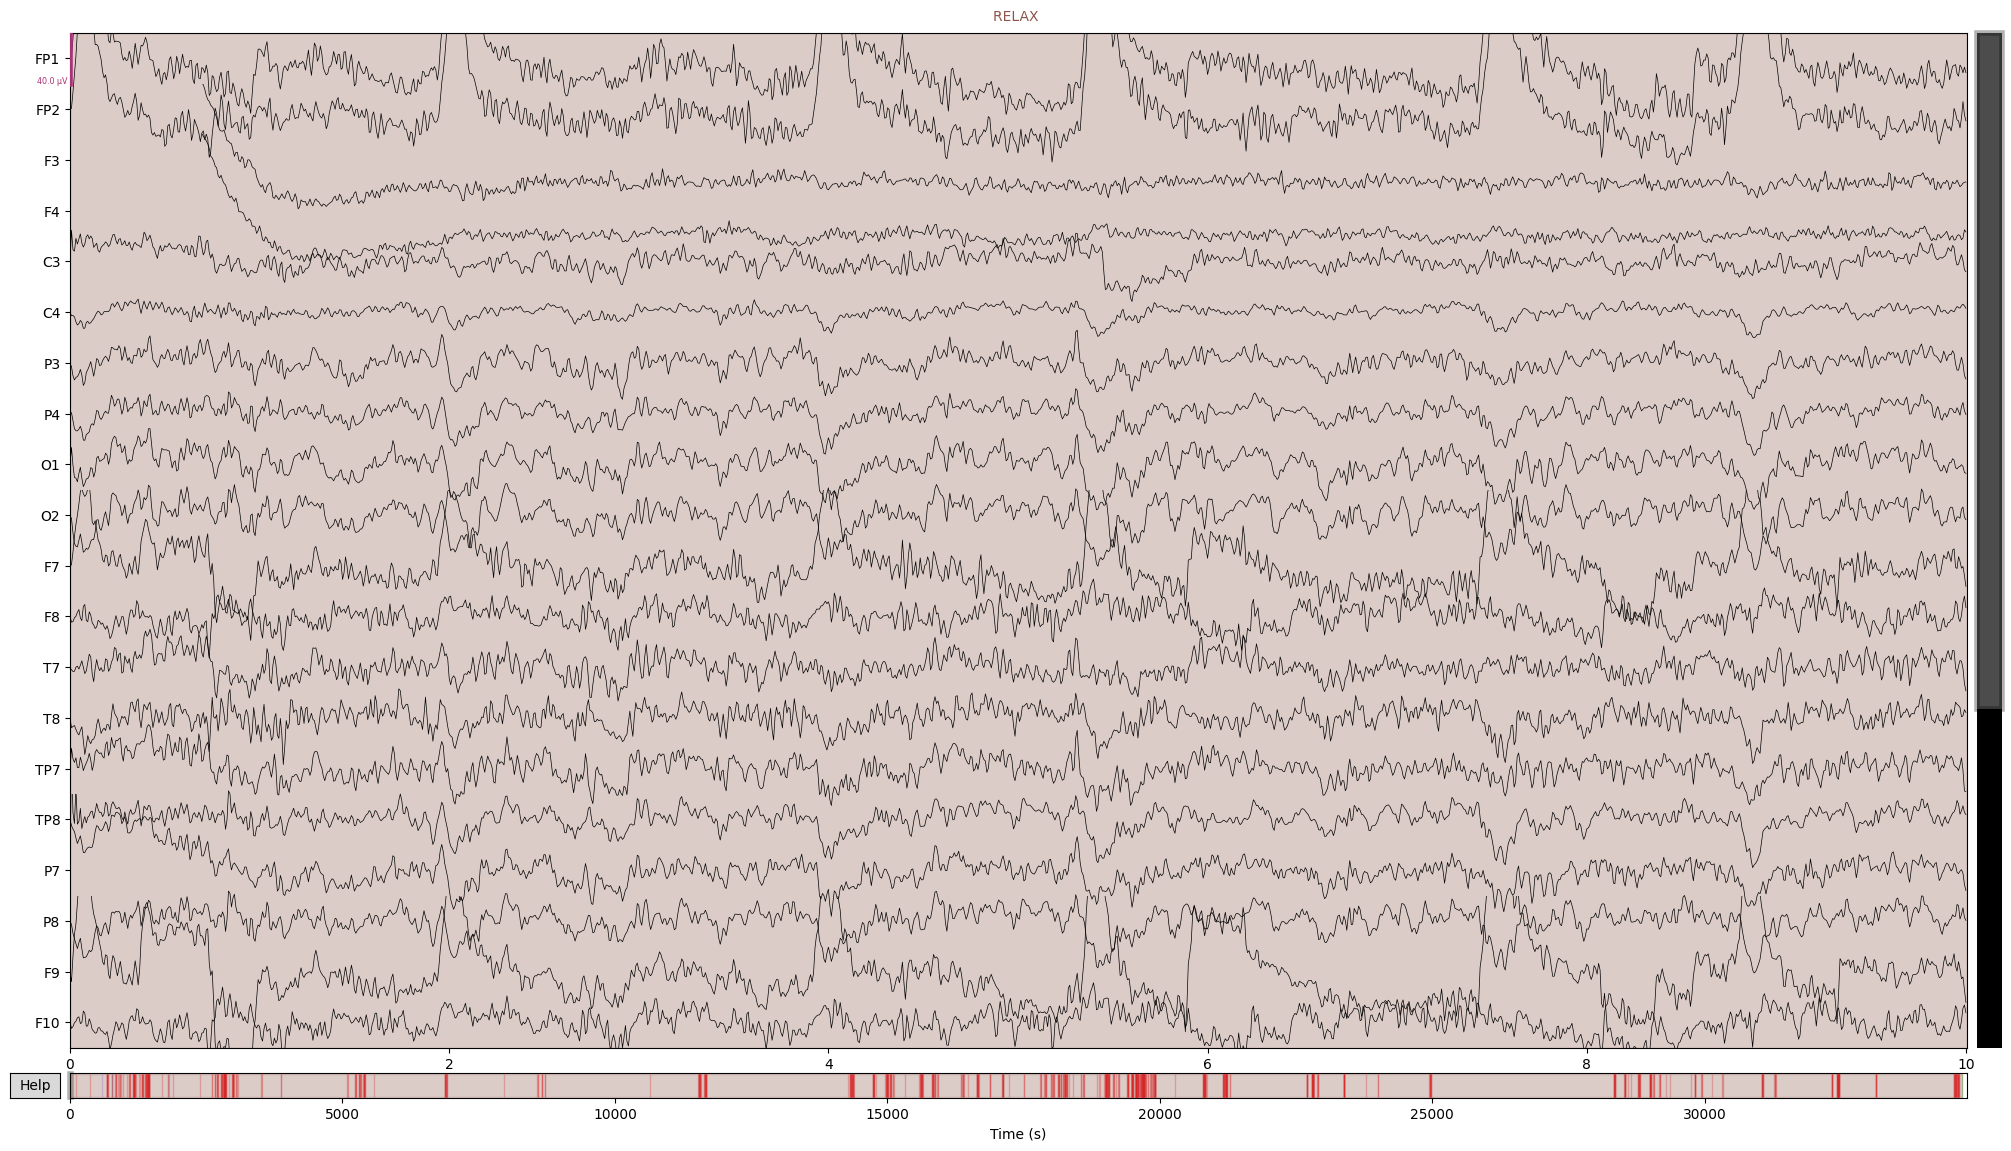

In [8]:
pipe = CleaningPipe(path_to_eeg=path_to_eeg,output_dir=output_dir,) #Initialize the Cleaning Pipeline
print(pipe.mne_raw.annotations)
fig = pipe.mne_raw.plot()

In [9]:
# Load a standard 10-20 montage
montage = mne.channels.make_standard_montage("standard_1020")

# Get only the channels that exist in the montage
valid_channels = [ch for ch in pipe.mne_raw.ch_names if ch in montage.ch_names]
pipe.mne_raw.pick_channels(valid_channels)

# Apply montage
pipe.mne_raw.set_montage(montage)

# Now run bad channel detection
#bad_channels = pipe.auto_detect_bad_channels()

pipe.mne_raw.info

pipe.set_eeg_reference(ref_channels="average", projection=True)

if bad_channels_selection.value == "manually":
    pipe.plot(save_bad_channels=True)
elif bad_channels_selection.value == "automatically":
    bad_channels = pipe.auto_detect_bad_channels()

pipe.read_bad_channels(path=None if bad_channels_selection.value == "Manually" else bad_channels)

pipe.interpolate_bads(reset_bads=True)

if annotations_selection.value == "manually":
    pipe.plot(butterfly=True, save_annotations=True, overwrite=True)
    pipe.read_annotations()
elif annotations_selection.value == "from-file":
    pipe.read_annotations(path=annotations)
elif annotations_selection.value == "automatically":
    pipe.auto_set_annotations()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading 0 ... 8910079  =      0.000 ... 34804.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/41 [00:00<?,       ?it/s]


RANSAC done!
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.5s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/6919 [00:00<?,       ?it/s]


RANSAC done!
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.3 mm
Computing interpolation matrix from 12 sensor positions
Interpolating 13 sensors


Interpolated channels: ['T10', 'Cz', 'T7', 'F3', 'T9', 'Fz', 'P3', 'F8', 'F7', 'F4', 'O1', 'P9', 'P7']


In [10]:
import datetime
recording_start = pipe.mne_raw.info["meas_date"]  # Get actual recording datetime
if isinstance(recording_start, tuple):  # MNE sometimes returns a tuple
    recording_start = recording_start[0]

# Convert to datetime format (if needed)
if isinstance(recording_start, float):
    recording_start = datetime.datetime.utcfromtimestamp(recording_start)

print(f"Recording started at: {recording_start}")

crop_offset = 18000  # The EEG was cropped at 20,000 sec
new_start_time = recording_start + datetime.timedelta(seconds=crop_offset)

print(f"Adjusted Recording Start (After Cropping): {new_start_time}")

Recording started at: 2024-11-22 14:08:21+00:00
Adjusted Recording Start (After Cropping): 2024-11-22 19:08:21+00:00


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import DateFormatter
import yasa
# os.environ["NUMBA_DISABLE_JIT"] = "1"
fig = create_dashboard(
    subject_code=subject_code,
    prec_pipe=pipe,
    hypno_psd_pick=picked_channel,
    hypnogram=hypnogram_path,
    predict_hypno_args=hypno_predict_arguments,
    hypno_freq=hypno_freq,
    reference="average",
)


2025-03-21 10:49:47,229 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.


average reference has been applied


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


2025-03-21 10:50:02,672 - yasa - INFO - Using pre-trained classifier: /opt/anaconda3/envs/sleep_env/lib/python3.10/site-packages/yasa/classifiers/clf_eeg_lgb_0.5.0.joblib
/opt/anaconda3/envs/sleep_env/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
Hypnogram is SHORTER than data by 5.0 seconds. Padding hypnogram with last value to match data.size.


Setting 380416 of 8910080 (4.27%) samples to NaN, retaining 8529664 (95.73%) samples.


/opt/anaconda3/envs/sleep_env/lib/python3.10/site-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 768 is greater than input length  = 256, using nperseg = 256
  return _func(*args, **kwargs)
2025-03-21 10:50:20,521 - numba.cuda.cudadrv.nvvm - ERROR - Failed to plot 'after' graph. It will be missing from the dashboard


4. Spectral

In [ ]:
# if hypnogram_path and hypnogram_path!="predict":
#     spectral_pipe = SpectralPipe(prec_pipe=ica_pipe,path_to_hypno=hypnogram_path,hypno_freq=hypno_freq)
# else:
#     spectral_pipe = SpectralPipe(prec_pipe=ica_pipe)
if hypnogram_path and hypnogram_path!="predict":
    spectral_pipe = SpectralPipe(prec_pipe=pipe,path_to_hypno=hypnogram_path,hypno_freq=hypno_freq)
else:
    spectral_pipe = SpectralPipe(prec_pipe=pipe)

if hypnogram_path is None or hypnogram_path=="predict":
    spectral_pipe.predict_hypno(
    eeg_name = hypno_predict_arguments["eeg_name"],
    eog_name = hypno_predict_arguments["eog_name"],
    emg_name =  hypno_predict_arguments["emg_name"],
    ref_name = hypno_predict_arguments["ref_name"],
    save=True)

spectral_pipe.plot_hypnospectrogram(picks=[picked_channel],save=True)

In [ ]:
spectral_pipe.compute_psd(
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},
    reference="average",
    # Additional arguments passed to the Welch method:
    n_fft=1024,
    n_per_seg=1024,
    n_overlap=512,
    window="hamming",
    verbose=True,
    save=False,
)
spectral_pipe.plot_psds(picks=[picked_channel], psd_range=(-30, 30),save=True)

In [ ]:
_ = spectral_pipe.psds["N2"].plot(picks="data", exclude ="bads", show=False)

In [ ]:
spectral_pipe.plot_topomap_collage(
    #  Bands to plot topomaps for.
    bands={
        "Delta": (0, 4),
        "Theta": (4, 8),
        "Alpha": (8, 12.5),
        "SMR": (12.5, 15),
        "Beta": (12.5, 30),
        "Gamma": (30, 60),
    },
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all",
    dB=False,  # Whether to transform PSD to dB/Hz.
    low_percentile=5,  # Set min color value by percentile of the band data.
    high_percentile=95,  # Set max color value by percentile of the band data.
    fig=None,  # Instance of plt.Figure, a new fig will be created if None.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
)

# TODO no locations file

In [ ]:
# Paramtrize spectrum
spectral_pipe.parametrize(
    picks=["eeg"],
    freq_range = [0.5, 60],
    average_ch=False,
)
spectral_pipe.fooofs["N2"].report()

In [ ]:
spectral_pipe.sleep_stats(save=False) # in minutes

In [ ]:
spectral_pipe.fooofs["N2"].get_fooof(ind=0).report()

In [ ]:
from fooof.analysis import get_band_peak_fg

smr_peaks = get_band_peak_fg(spectral_pipe.fooofs["N2"], band=[12.5, 15]) # sigma band - includes sleep spindles and sensory-motor rhythm (smr)
smr_peaks #returns peaks
# centered frequency, power of the peak, bandwith

5. Events

In [ ]:
spindles_pipe = SpindlesPipe(prec_pipe=spectral_pipe)

spindles_pipe.detect()
spindles_pipe.plot_average(
    center="Peak",
    hue="Stage",
    time_before=1,
    time_after=1,
    save=True
)

In [ ]:
spindles_pipe.plot_topomap(
    prop="Frequency",  #  Any of the event properties returned by pipe.results.summary().
    stage="N2",  # Stage to plot the topomap for.
    aggfunc="mean",  # Aggregation function for channel grouping.
    # Should contain at least index of the provided "stage".
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},
    axis=None,  # Whether to plot on provided matplotlib axis.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
)

In [ ]:
spindles_pipe.results.summary(grp_chan=False, grp_stage=True)

In [ ]:
spindles_pipe.plot_topomap_collage(
    # Some of the event properties returned by pipe.results.summary().
    props=["Amplitude", "Frequency", "Duration"],
    aggfunc="mean",  # Aggregation function for channel grouping.
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all",
    # Should contain at least indices of the provided "stages_to_plot".
    sleep_stages={"N2": 2, "N3": 3},
    low_percentile=5,  # Set min color value by percentile of the property data.
    high_percentile=95,  # Set max color value by percentile of the property data.
    fig=None,  # Instance of plt.Figure, a new fig will be created if None.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
)


In [ ]:
spindles_pipe.compute_tfr(
    freqs=(10, 20),  # Interval of frequencies of interest.
    n_freqs=100,  # TFR frequency resolution.
    time_before=1,  # Time in sec before the peak to use in TFR computation. Should be positive.
    time_after=1,  # Time in sec after the peak to use in TFR computation.
    method="morlet",  # TFR method: 'morlet' or 'multitaper'.
    save=False,  # Whether to save AverageTFR object per sleep stage as hdf5 file.
    overwrite=False,  # Whether to overwrite existing files.
)

spindles_pipe.tfrs

In [ ]:
spindles_pipe.tfrs["N2"].data

In [ ]:
spindles_pipe.tfrs["N2"].to_data_frame()

In [ ]:
spindles_pipe.tfrs["N2"].plot(["Pz"]),
spindles_pipe.tfrs["N3"].plot(["Pz"])

5.1.2. Picked channels results

In [ ]:
spindles_pipe.detect(picks=['Pz', 'Cz', 'Fz'], include=(1,2,3))
spindles_pipe.results.summary().round(3)

In [ ]:
spindles_pipe.results.summary(grp_chan=True, grp_stage=True, aggfunc='mean')

Average spindle

In [ ]:
# Plot an average template per channel
spindles_pipe.plot_average(ci=None, palette="Set1")

In [ ]:
# Plot an average template per stage, using a custom color palette
spindles_pipe.plot_average(hue="Stage", ci=None, palette=['tab:grey', 'tab:blue', '#114061'])

Check agreement between channels

- Using recall score:

In [ ]:
spindles_pipe.results.compare_channels(score="recall", max_distance_sec=0.5).round(3)

- Using F1 score:

In [ ]:
spindles_pipe.results.compare_channels(max_distance_sec=0.5).round(3)

Finding spindles that are present on at least 2 channels

In [ ]:
spindles_pipe.detect(picks=['Pz', 'Cz', 'Fz'], remove_outliers=True, multi_only=True)
spindles_pipe.results.summary().round(3)

In [ ]:
spindles_pipe.results.summary(grp_chan=True)

Comparing 2 detections

In [ ]:
spindles_pipe.results.get_sync_events(center='Peak', time_before=0.8, time_after=0.8)

In [ ]:
spindles_pipe.results.get_coincidence_matrix(scaled=False)

In [ ]:
coincidence = spindles_pipe.results.get_coincidence_matrix()
coincidence

In [ ]:
import seaborn as sns
sns.set(style="white", font_scale=1.25)


mask = np.zeros_like(coincidence)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(coincidence, mask=mask, square=True, cmap="rocket")


5.2. Slow waves

In [ ]:
slow_waves_pipe = SlowWavesPipe(prec_pipe=spindles_pipe)
slow_waves_pipe.detect(
    picks=["eeg"],
    reference="average",
    include=(2, 3),
    freq_sw=(0.3, 1.5),
    dur_neg=(0.3, 1.5),
    dur_pos=(0.1, 1),
    amp_neg=(40, 200),
    amp_pos=(10, 150),
    amp_ptp=(75, 350),
    coupling=False,
    coupling_params={"freq_sp": (12, 16), "p": 0.05, "time": 1},
    remove_outliers=False,
    verbose=False,
    save=True,
)

slow_waves_pipe.plot_average(
    center="NegPeak",
    hue="Stage",
    time_before=0.4,
    time_after=0.8,
    save=True
)

In [ ]:
slow_waves_pipe.results.summary(
    grp_chan=False, grp_stage=True, mask=None, aggfunc="mean", sort=True
)

In [ ]:
slow_waves_pipe.plot_topomap(
    prop="Slope",  #  Any of the event properties returned by pipe.results.summary().
    stage="N3",  # Stage to plot the topomap for.
    aggfunc="mean",  # Aggregation function for channel grouping.
    # Should contain at least index of the provided "stage".
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},
    axis=None,  # Whether to plot on provided matplotlib axis.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
)

In [ ]:
slow_waves_pipe.plot_topomap_collage(
    # Some of the event properties returned by pipe.results.summary().
    props=["Slope", "Frequency", "Duration"],
    aggfunc="mean",  # Aggregation function for channel grouping.
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all",
    # Should contain at least indices of the provided "stages_to_plot".
    sleep_stages={"N2": 2, "N3": 3},
    low_percentile=5,  # Set min color value by percentile of the property data.
    high_percentile=95,  # Set max color value by percentile of the property data.
    fig=None,  # Instance of plt.Figure, a new fig will be created if None.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
)

In [ ]:
slow_waves_pipe.compute_tfr(
    freqs=(0.5, 5), n_freqs=100, time_before=4, time_after=4, n_cycles=2,save=False
)
slow_waves_pipe.tfrs



In [ ]:
slow_waves_pipe.tfrs["N2"].to_data_frame()

In [ ]:
slow_waves_pipe.tfrs["N2"].plot(["Cz"]),
slow_waves_pipe.tfrs["N3"].plot(["Cz"])